In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab.data_table import DataTable
DataTable.max_columns = 100

In [2]:
df=pd.read_csv('2012_2019_PlatteRiverWeir_features_merged_all.csv')

In [4]:
#Ver a rasgos generales el dataframe
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


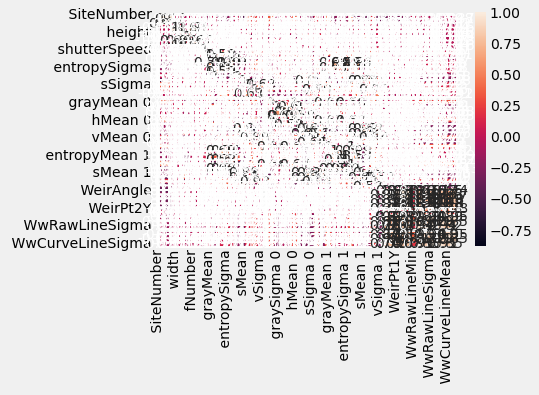

In [5]:
#Ver un mapa de correlaciones
corr_df = df.corr()
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
#Ver a detalle los valores de correlacion
corr_df

In [3]:
#Dar formato a las columnas
for i in df:
  j=i
  if i[0] == " ":
    i = i[1:]
  df.rename(columns={j: i},inplace=True)

In [4]:
#X=df[['graySigma','grayMean','entropyMean','entropySigma','hMean','sMean','vMean']]
X=df[['entropyMean', 'entropyMean 0','entropyMean 1','entropySigma',
      'entropySigma 0','sSigma','sMean','hMean 1','hSigma 1','WeirAngle']]
y=df['Stage']
y2=df['Discharge']

In [ ]:
corr_X = X.corr()
sns.heatmap(corr_X, annot=True)
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)

In [10]:
parameters ={'hidden_layer_sizes': np.arange(start=0, stop=201, step=5)}
mlp=MLPRegressor(learning_rate='adaptive', solver = 'adam', alpha=0.0001, max_iter = 1000)
clf = GridSearchCV(mlp, parameters,cv=5, refit=True, return_train_score=True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 205.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 387, in _fit
    "hidden_layer_sizes must be > 0, got %

GridSearchCV(cv=5,
             estimator=MLPRegressor(learning_rate='adaptive', max_iter=1000),
             param_grid={'hidden_layer_sizes': array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200])},
             return_train_score=True)

In [11]:
clf.best_params_

{'hidden_layer_sizes': 175}

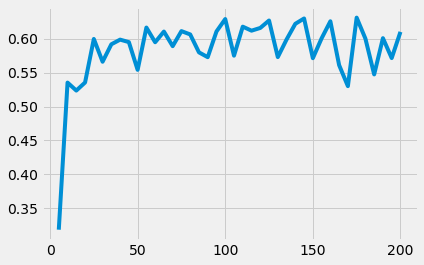

In [12]:
xpoints = np.arange(start=0, stop=201, step=5)
ypoints = clf.cv_results_['mean_test_score']

plt.plot(xpoints, ypoints)
plt.show()

In [6]:
regr = MLPRegressor(hidden_layer_sizes=175,learning_rate='adaptive', solver = 'adam', alpha=0.0001, max_iter = 1000,random_state=0).fit(X_train, y_train)
y_pred=regr.predict(X_test)

regr.score(X_test, y_test)

0.6581985685793287

In [7]:
regr = MLPRegressor(hidden_layer_sizes=(10,175,1),learning_rate='adaptive', solver = 'adam', alpha=0.0001, max_iter = 1000,random_state=0).fit(X_train, y_train)
y_pred=regr.predict(X_test)

regr.score(X_test, y_test)

-0.00047732621418927756

In [8]:
regr = RandomForestRegressor(max_depth=12, random_state=0)
regr.fit(X_train, y_train)

print(regr.score(X_test,y_test))

0.8133815943609765


In [9]:
from sklearn.svm import SVR
regr = SVR(kernel='rbf')
regr.fit(X_train, y_train)
print(regr.score(X_test,y_test))

0.5347203317498008


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y2,train_size=0.8)

In [11]:
regr = MLPRegressor(hidden_layer_sizes=175,learning_rate='adaptive', solver = 'adam', alpha=0.0001, max_iter = 1000,random_state=0).fit(X_train, y_train)
y_pred=regr.predict(X_test)

regr.score(X_test, y_test)

0.6329193400923856

In [12]:
regr = RandomForestRegressor(max_depth=12, random_state=0)
regr.fit(X_train, y_train)

print(regr.score(X_test,y_test))

0.7888634779933821


In [13]:
regr = SVR(kernel='rbf')
regr.fit(X_train, y_train)
print(regr.score(X_test,y_test))

0.15688182991383237
